# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Brain Stroke Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://www.sinakhan.com/media/photos/BrainAneurysm.jpg" style='width: 350px; height: 350px;'>
</p>

<p style="text-align:justify; ">
<B>Brain Stroke</B> happens when there is a blockage in the blood circulation in the brain or when a blood vessel in the brain breaks and leaks. The burst or blockage prevents blood and oxygen reaching the brain tissue. Without oxygen the tissues and cells in the brain are damaged and die in no time leading to many symptoms.<br>
<br>    
Once brain cells die, they generally do not regenerate and devastating damage may occur, sometimes resulting in physical, cognitive and mental disabilities. It is crucial that proper blood flow and oxygen be restored to the brain as soon as possible.<br>
<br>    
Worldwide, brain stroke is the second leading cause of death and third leading cause of disability. In some cases, the warning signs of a stroke can be obvious but what’s going on inside the body is incredibly complex. 80% of strokes are preventable. But once you’ve had a stroke, the chances you have another one are greater. 
</p>    



<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **id:** Unique identifier
* **gender:** Gender of the patient (Male, Female, Other)
* **age:** Age of the patient
* **hypertension:** **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
* **heart_disease:** **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
* **ever_married:** **Yes** if the patient is married, **No** if the patient is not married 
* **work_type:** Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)
* **Residence_type:** Residence category of the patient (Rural, Urban)
* **avg_glucose_level:** Average glucose level in blood of the patient
* **bmi:** Body Mass Index of the patient
* **smoking_status:** Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). **Unknown** in **smoking_status** means that the information is unavailable for this patient
* **stroke:** **1** if the patient had a stroke or **0** if not


In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<a id="4"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")


There is 0 duplicate entry among 5110 entries in this dataset.


In [7]:
data.isna().sum().to_frame().T

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,201,0,0


**Insights:**

* There are missing values in **bmi**. We will drop the rows that have missing bmi values.
* There is no duplicate values in this dataset.
* We will encode the categorical features into numerical form later.

<a id="5"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [8]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
data.isna().sum().to_frame().T

After dropping null values, the shape of the Dataset is (4909, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data.columns= data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')

In [28]:
data["age"] = data["age"].astype("int")
data = data[data["gender"] != "Other"]
data = data[data["smoking_status"] != "Unknown"]
data["ever_married"].replace({"No":0, "Yes":1}, inplace = True)
data["residence_type"].replace({"Urban":0, "Rural":1}, inplace = True)
data["gender"].replace({"Male":0, "Female":1}, inplace = True)
data["work_type"].replace({"children":0, "Never_worked":1, "Self-employed":2, "Govt_job":3, "Private":4}, inplace = True)
data["smoking_status"].replace({"never smoked":0,"formerly smoked":1, "smokes":2}, inplace = True)

In [11]:
print("After preprocessing, let's have a glimpse of the final dataset :")
data.head()

After preprocessing, let's have a glimpse of the final dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,4,0,228.69,36.6,1,1
2,31112,0,80,0,1,1,4,1,105.92,32.5,0,1
3,60182,1,49,0,0,1,4,0,171.23,34.4,2,1
4,1665,1,79,1,0,1,2,1,174.12,24.0,0,1
5,56669,0,81,0,0,1,4,0,186.21,29.0,1,1


<a id="9"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Smoking Status</p>

Let's have a look on the ratio of stroke patient's smoking status :


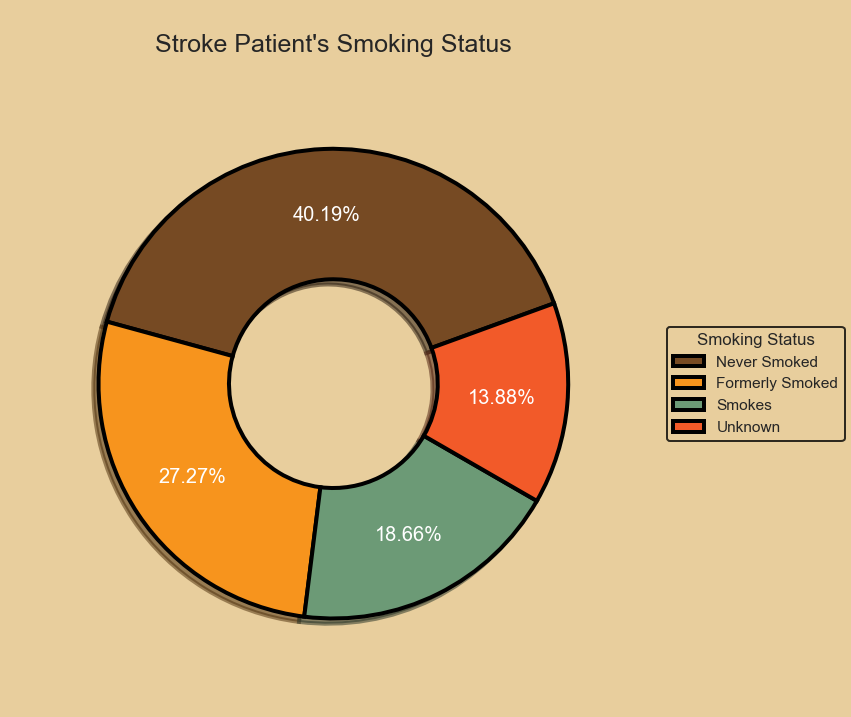

In [82]:
print(f"Let's have a look on the ratio of stroke patient's smoking status :")
plt.subplots(figsize=(12, 12))

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["stroke"] == "Yes"]["smoking_status"].value_counts(ascending=False).values[0],
                                    data[data["stroke"] == "Yes"]["smoking_status"].value_counts(ascending=False).values[1],
                                    data[data["stroke"] == "Yes"]["smoking_status"].value_counts(ascending=False).values[2],
                                    data[data["stroke"] == "Yes"]["smoking_status"].value_counts(ascending=False).values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:4], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Smoking Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Smoking Status",fontsize=25)
plt.show()

**Insights:**

* Most of the stroke patients have **Never Smoked** with a ratio of **36.14%**
* Some of the stroke patients have **Smoked Previuosly** with a ratio of **28.11%**
* For some patients, the smoking status is unknown 

<a id="10"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Marital Status</p>

Let's have a look on the ratio of stroke patient's marital status :


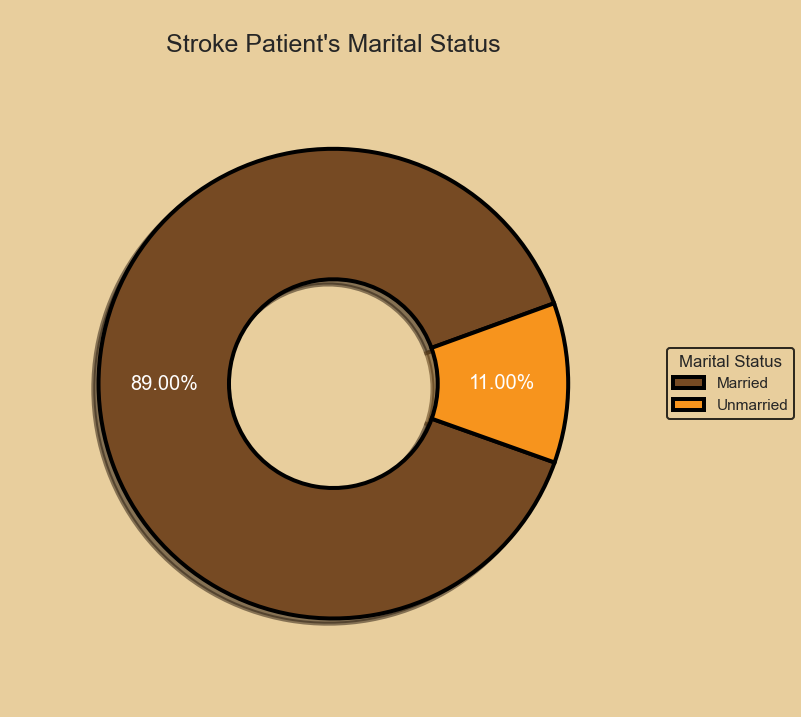

In [83]:
print(f"Let's have a look on the ratio of stroke patient's marital status :")
plt.subplots(figsize=(12, 12))

labels = "Married","Unmarried"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["stroke"] == "Yes"]["ever_married"].value_counts(ascending=False).values[0],
                                    data[data["stroke"] == "Yes"]["ever_married"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Marital Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Marital Status",fontsize=25)
plt.show()

**Insights:**

* Most of the stroke patients are **Married** with a ratio of **88.35%** followed by **Unmarried** with a ratio of **11.65%**

<a id="11"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's BMI</p>

Let's have a look on the distribution of stroke patient's BMI :


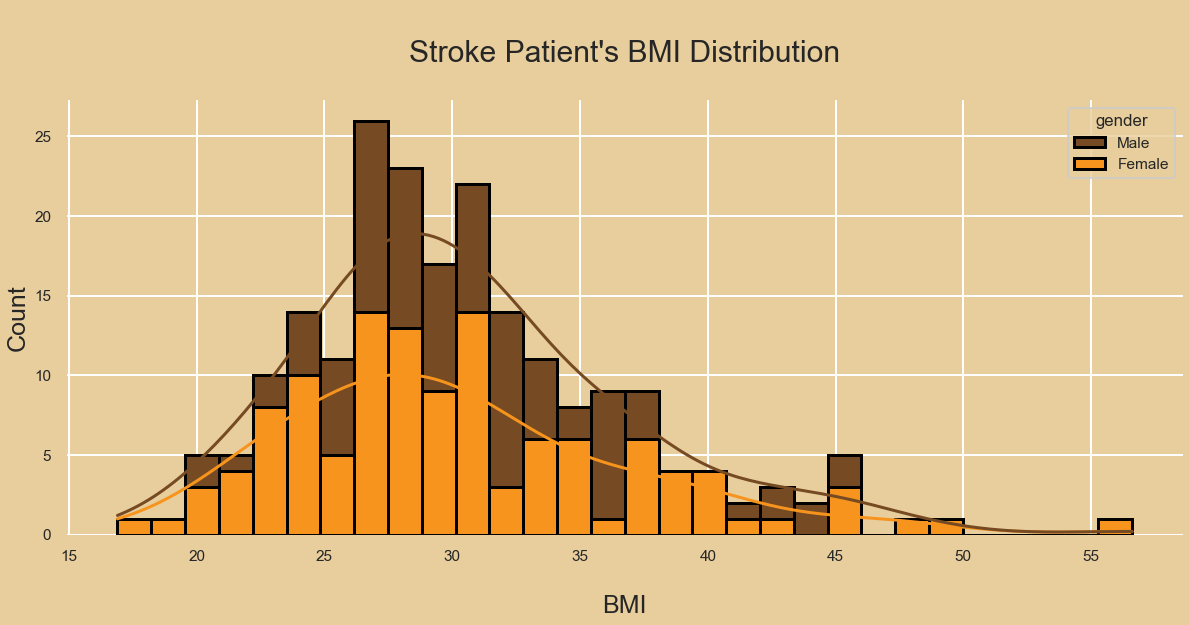

In [84]:
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["stroke"] == "Yes"],x="bmi",hue="gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's BMI Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nBMI",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see the stroke patient's BMI distribution is right skewed. Most of the patient's BMI  fall in between **25** to **35**.
* Also there are some high BMI values too.

<a id="12"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Heart Disease</p>

Let's have a look on the ratio of stroke patient's heart disease :


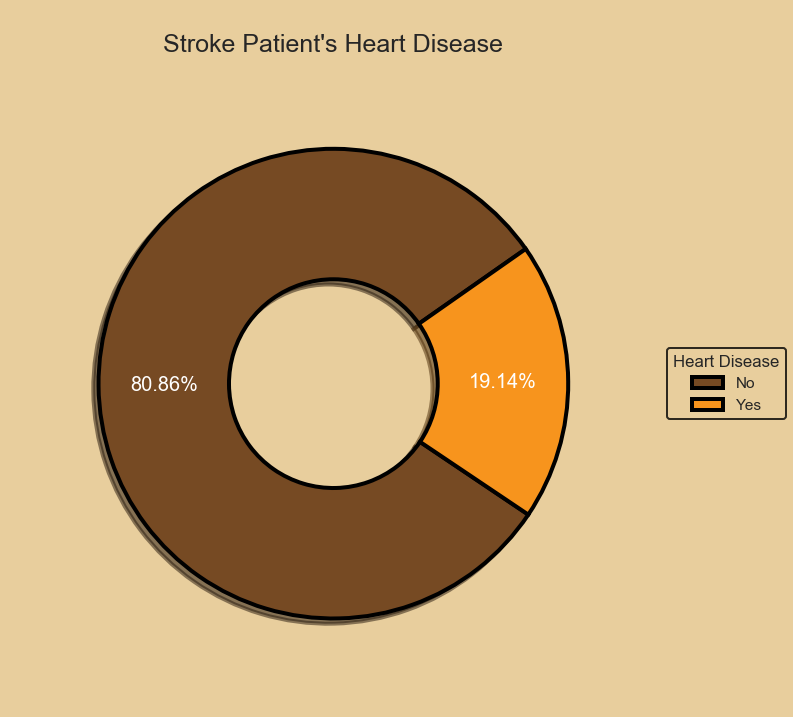

In [85]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(12, 12))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["stroke"] == "Yes"]["heart_disease"].value_counts(ascending=False).values[0],
                                    data[data["stroke"] == "Yes"]["heart_disease"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 35)

plt.legend(wedges, labels, title="Heart Disease",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Heart Disease",fontsize=25)
plt.show()

**Insights:**

* Most of the stroke patients do not have heart disease. Only **18.88%** patients have heart disease

<a id="13"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Hypertension Status</p>

Let's have a look on the ratio of stroke patient's heart disease :


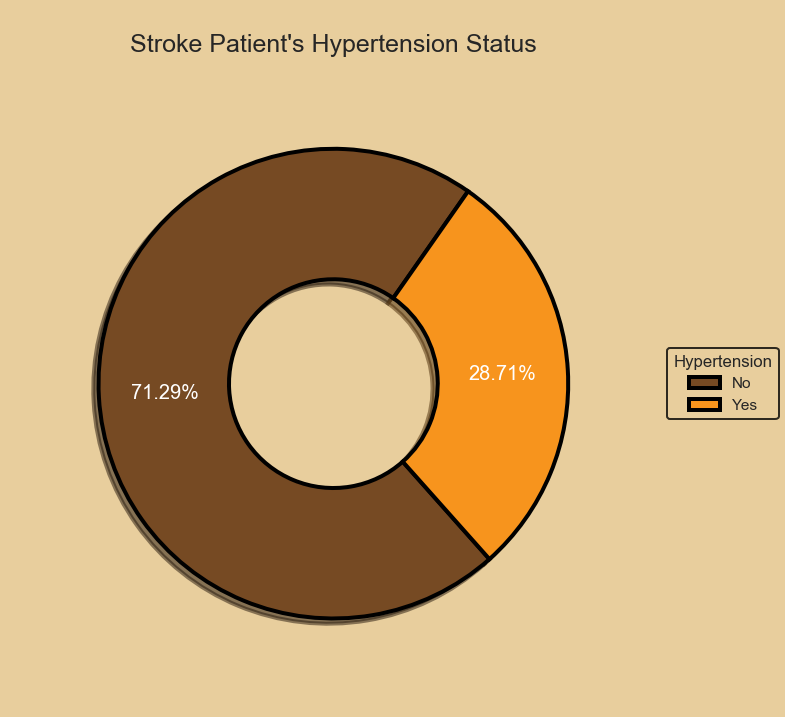

In [86]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(12, 12))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["stroke"] == "Yes"]["hypertension"].value_counts(ascending=False).values[0],
                                    data[data["stroke"] == "Yes"]["hypertension"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 55)

plt.legend(wedges, labels, title="Hypertension",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Hypertension Status",fontsize=25)
plt.show()

**Insights:**

* Most of the stroke patients do not have hypertension. Only **26.51%** patients have hypertension

<a id="14"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Average Glucose Level</p>

Let's have a look on the distribution of stroke patient's average glucose level :


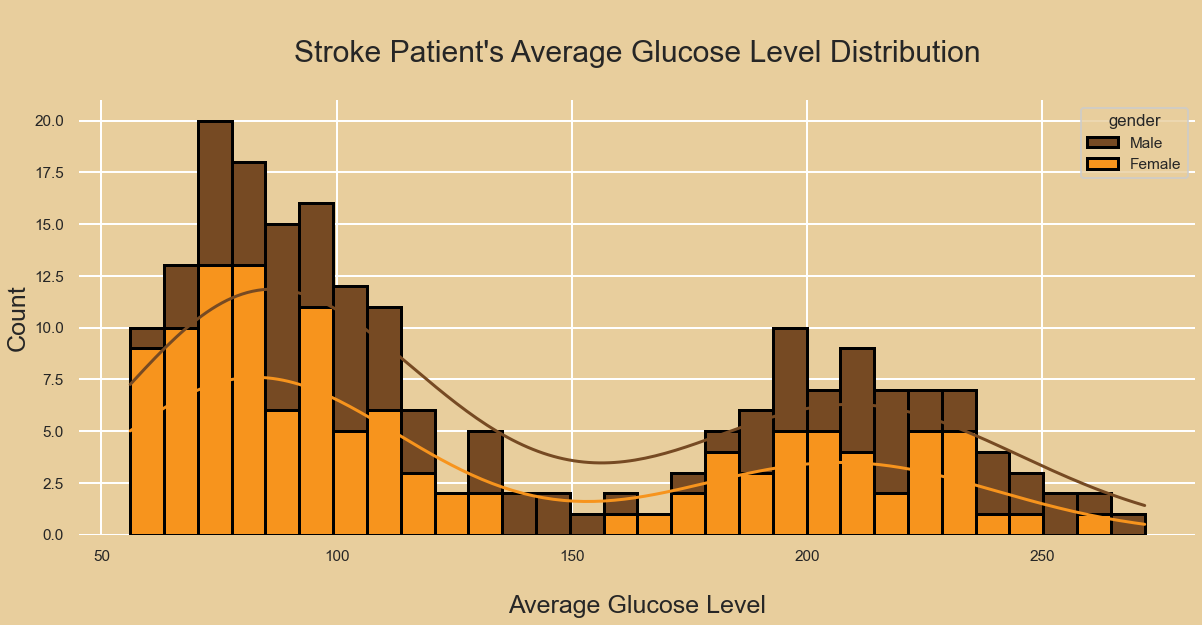

In [88]:
print(f"Let's have a look on the distribution of stroke patient's average glucose level :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["stroke"]=="Yes"],x="avg_glucose_level",hue="gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAverage Glucose Level",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see most of the patient's average glucose levels fall in between **60** to **120**
* Also there are some high average glucose levels too

<a id="15"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Occupation</p>

Let's have a look on the ratio of stroke patient's occupation type :


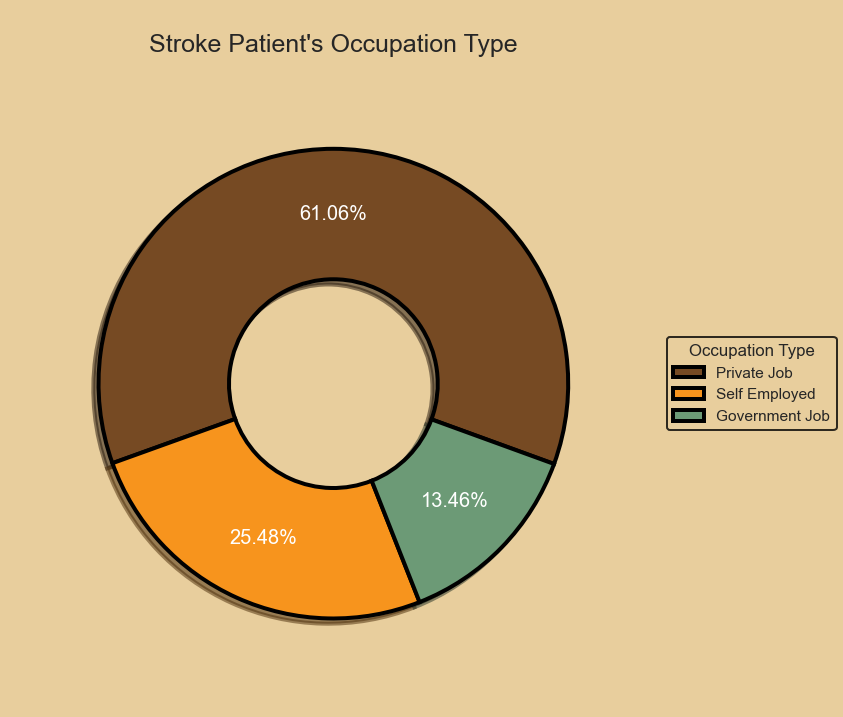

In [89]:
print(f"Let's have a look on the ratio of stroke patient's occupation type :")
plt.subplots(figsize=(12, 12))

labels = "Private Job","Self Employed","Government Job"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["stroke"] == "Yes"]["work_type"].value_counts(ascending=False).values[0],
                                    data[data["stroke"] == "Yes"]["work_type"].value_counts(ascending=False).values[1],
                                    data[data["stroke"] == "Yes"]["work_type"].value_counts(ascending=False).values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:3], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -20)

plt.legend(wedges, labels, title="Occupation Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type",fontsize=25)
plt.show()

**Insights:**

* Most of the stroke patients have experience of **Private Job** with a ratio of **60.32%**
* Some of the stroke patients have experience of **Self Employment** with a ratio of **26.32%**
* Some of the stroke patients have experience of **Government Job** with a ratio of **13.36%**


<a id="16"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Residence</p>

Let's have a look on the ratio of stroke patient's residence type :


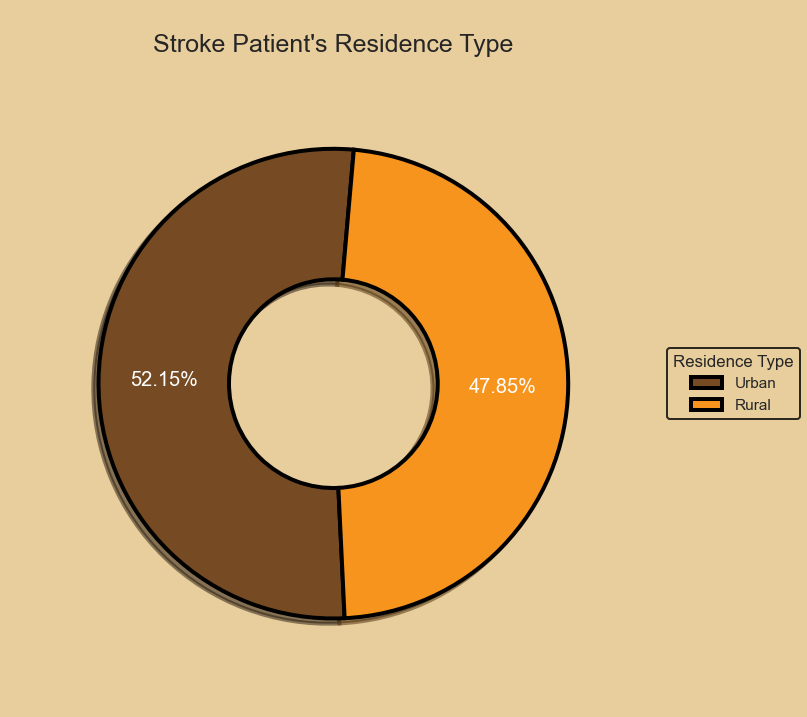

In [90]:
print(f"Let's have a look on the ratio of stroke patient's residence type :")
plt.subplots(figsize=(12, 12))

labels = "Urban","Rural"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["stroke"] == "Yes"]["residence_type"].value_counts(ascending=False).values[0],
                                    data[data["stroke"] == "Yes"]["residence_type"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 85)

plt.legend(wedges, labels, title="Residence Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Residence Type",fontsize=25)
plt.show()

**Insights:**

* **54.22%** patients live in **Urban** area and **45.78%** patients live in **Rural** area

<a id="18"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

After performing standardization, we have splitted the dataset with a ratio of 0.2 that means 80% data for training and 20% data for validation process.

In [31]:
x = data.drop(["stroke"],axis =1)
y = data["stroke"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (2740, 11), (2740,)
Shape of testing data : (685, 11), (685,)


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤLogistic Regressionㅤ</span>

In [32]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[640   1]
 [ 43   1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       641
           1       0.50      0.02      0.04        44

    accuracy                           0.94       685
   macro avg       0.72      0.51      0.51       685
weighted avg       0.91      0.94      0.91       685


The Accuracy of Logistic Regression is 93.58 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#432C0A;font-size:200%;font-weight: 500;color:#c69c6c;overflow:hidden;">ㅤGaussian Naive Bayesㅤ</span>

In [33]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[562  79]
 [ 27  17]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       641
           1       0.18      0.39      0.24        44

    accuracy                           0.85       685
   macro avg       0.57      0.63      0.58       685
weighted avg       0.90      0.85      0.87       685


The Accuracy of Gaussian Naive Bayes is 84.53 %


<a id="19"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>


This code is taken from this notebook  
  [https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03](https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03)


